# Serial correlation of permutations - SHA256

Permutations should show no serial correlation. I measure serial correlation by the number of fixed points between the first list and the permutation of it. The distribution of the number of fixed points has a Poisson distribution when the length of the list is "long enough".

We generated $2 \times 10^5$ permutations of the numbers $(1, 2, \dots, 2100)$ and computed the distribution of the number of fixed points, then tested whether the observed distribution matched the theoretical one. We repeated this for 1000 different starting seeds.

## Probability distribution of the number of matches
Let $S_n$ denote the number of matches between the previous permutation and the current permutation.
Let $D_n$ denote the number of derangements (permutations where no element is fixed) of $n$ items.
$D_n$ satisfies the recurrence relation $D_n = (n-1)\left( D_{n-1} + D_{n-2}\right)$ with initial values $D_1 = 0, D_2 = 1$.

\begin{align*}
P(S_n=0) &= \frac{D_n}{n!} \\ 
P(S_n=1) &= \frac{n D_{n-1}}{n!} \\
\vdots \\
P(S_n = k) &= \frac{{n \choose k} D_{n-k}}{n!} 
\end{align*}

## Poisson approximation

The number of matches $S_n$ is a sum of indicator variables, one for each position in the list. $X_i = 1$ if position $i$ is the same in the two permutations and $0$ otherwise. The probability that position $i$ is fixed is $\frac{1}{n}$, for each $i$.

It turns out that the sum of correlated Bernoulli random variables is asymptotically Poisson distributed, with parameter equal to the sum of all of the Bernoulli parameters. Therefore, $S_n$ is asymptotically Poisson distributed with parameter $1$.

## Chi-squared test

To get a $p$-value for whether the observed distribution matched the Poisson(1), we used a chi-squared test. We used 12 categories: one for 0 through 10 matches and one for 11+.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.stats import chisquare, kstest, ks_2samp, anderson_ksamp
from serial_test import test_poisson, exact_chisq_distr

In [2]:
cell_counts = np.loadtxt("sha_fp_distr_2100.csv", delimiter=",")

reps = 2*10**5
expected_counts = np.array(np.exp(-1)*np.array([1./math.factorial(k) for k in range(11)]) * reps)
expected_counts = np.append(expected_counts, reps - sum(expected_counts))
expected_distr = [[i]*expected_counts[i] for i in range(len(expected_counts))]
expected_distr = sum(expected_distr, [])

ks_pvalue = [1]*1000
pvalues_nmax11 = [1]*1000
exact_chisq_11 = exact_chisq_distr(reps, nmax=11)
pvalues_nmax10 = [1]*1000
exact_chisq_10 = exact_chisq_distr(reps, nmax=10)
pvalues_nmax9 = [1]*1000
exact_chisq_9 = exact_chisq_distr(reps, nmax=9)
pvalues_nmax8 = [1]*1000
exact_chisq_8 = exact_chisq_distr(reps, nmax=8)
pvalues_nmax7 = [1]*1000
exact_chisq_7 = exact_chisq_distr(reps, nmax=7)
ad_pvalue = [1]*1000


for j in range(1000):
    distr = [[i]*cell_counts[j][i] for i in range(len(cell_counts[j]))]
    distr = sum(distr, [])
    pvalues_nmax11[j] = test_poisson(distr, exact_chisq_11, nmax=11)
    pvalues_nmax10[j] = test_poisson(distr, exact_chisq_10, nmax=10)
    pvalues_nmax9[j] = test_poisson(distr, exact_chisq_9, nmax=9)
    pvalues_nmax8[j] = test_poisson(distr, exact_chisq_8, nmax=8)
    pvalues_nmax7[j] = test_poisson(distr, exact_chisq_7, nmax=7)
    ks_pvalue[j] = ks_2samp(distr, expected_distr)[1]
    ad_pvalue[j] = anderson_ksamp([distr, expected_distr])[2]

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel/__main__.py:6: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel/__main__.py:24: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/scipy/stats/morestats.py:1684: UserWarning: approximate p-value will be computed by extrapolation
  warnings.warn("approximate p-value will be computed by extrapolation")


In [3]:
np.random.seed(347728688) # From random.org Timestamp: 2017-01-19 18:22:16 UTC
seed_values = np.random.randint(low = 1, high = 2**32, size = 1000)

KstestResult(statistic=0.037500000000000089, pvalue=0.11711311505628541)

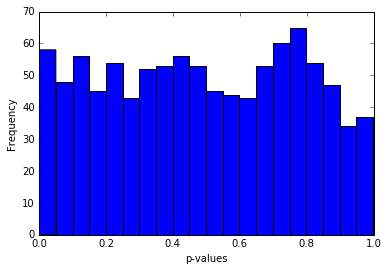

In [4]:
plt.hist(pvalues_nmax11, bins=20)
plt.xlabel("p-values")
plt.ylabel("Frequency")
kstest(pvalues_nmax11, 'uniform')

KstestResult(statistic=0.037699999999999956, pvalue=0.11362624819478095)

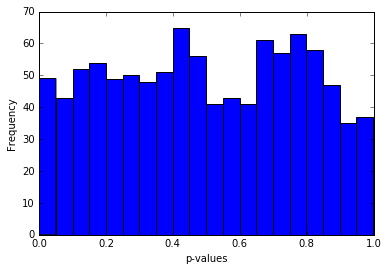

In [5]:
plt.hist(pvalues_nmax10, bins=20)
plt.xlabel("p-values")
plt.ylabel("Frequency")
kstest(pvalues_nmax10, 'uniform')

KstestResult(statistic=0.034499999999999975, pvalue=0.18078272583533828)

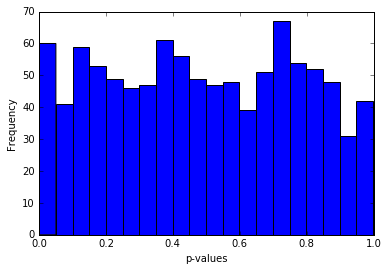

In [6]:
plt.hist(pvalues_nmax9, bins=20)
plt.xlabel("p-values")
plt.ylabel("Frequency")
kstest(pvalues_nmax9, 'uniform')

KstestResult(statistic=0.032299999999999995, pvalue=0.2429278735183964)

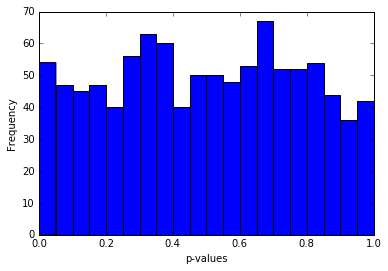

In [7]:
plt.hist(pvalues_nmax8, bins=20)
plt.xlabel("p-values")
plt.ylabel("Frequency")
kstest(pvalues_nmax8, 'uniform')

KstestResult(statistic=0.042100000000000026, pvalue=0.056114506825175381)

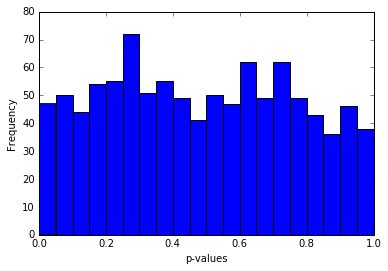

In [8]:
plt.hist(pvalues_nmax7, bins=20)
plt.xlabel("p-values")
plt.ylabel("Frequency")
kstest(pvalues_nmax7, 'uniform')

KstestResult(statistic=0.75432640116947769, pvalue=0.0)

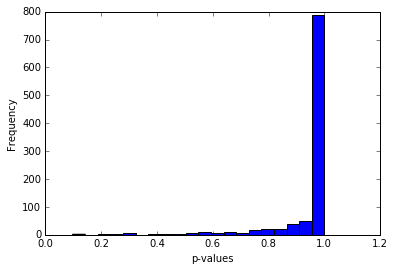

In [9]:
plt.hist(ks_pvalue, bins=20)
plt.xlabel("p-values")
plt.ylabel("Frequency")
kstest(ks_pvalue, 'uniform')

KstestResult(statistic=0.40758267093865785, pvalue=0.0)

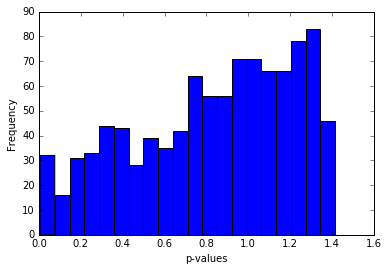

In [10]:
plt.hist(ad_pvalue, bins=20)
plt.xlabel("p-values")
plt.ylabel("Frequency")
kstest(ad_pvalue, 'uniform')

# Evidence that the Poisson approximation works


We use the above formulas to actually compute the probabilities for $n = 3, 4, ... 150$. Once we get to $n=171$, there's a numerical overflow and we can't calculate things this way. However it seems fine: the approximation error goes to zero quickly.

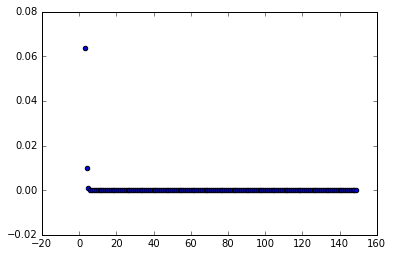

In [11]:
def count_derangements(n):
    """
    Count the number of derangements of k items, for k=0, 1, ..., n
    """
    derangements = np.ones(n+1)
    derangements[1] = 0
    for i in range(3, n+1):
        derangements[i] = (i-1)*(derangements[i-1] + derangements[i-2])
    return derangements


def fixed_perm_probabilities(n, k):
    """
    Derive the frequency of permutations of n items that fix exactly i items,
    for i = 0, 1, ..., k
    """
    perm_count = np.zeros(k+1)
    derangements = count_derangements(n)
    for i in range(k+1):
        perm_count[i] = derangements[n-i]/(math.factorial(i)*math.factorial(n-i))
    return perm_count

nmax = 10
approx = np.exp(-1)*np.array([1./math.factorial(k) for k in range(nmax)])
err = np.zeros(150)
for n in range(3, 150):
    if nmax > n:
        exact = fixed_perm_probabilities(n, n)
        xx = len(exact)
        err[n] = np.sum( (approx[:xx]-exact)**2 )
    else:
        exact = fixed_perm_probabilities(n, nmax)
        err[n] = np.sum( (approx-exact[:nmax])**2 )        
plt.scatter(range(3, 150), err[3:])

# Seed vs p-value

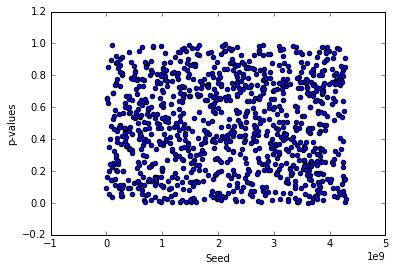

In [12]:
plt.scatter(seed_values, pvalues_nmax11)
plt.ylabel("p-values")
plt.xlabel("Seed")
plt.show()

In [13]:
bad_seeds = seed_values[np.array(pvalues_nmax11) <= 0.01]
bad_seeds

array([ 983834923, 4273781355, 3684701143, 1524760262, 2772407907,
       3409106073, 1604599911, 1171397965,  686490105, 1322696296,
       3604939265, 1434775377, 3436212751])

In [14]:
count_mismatch = []
for j in range(1000):
    count_mismatch.append(cell_counts[j] - expected_counts)
    
np.array(cell_counts[np.array(pvalues_nmax11) <= 0.01], dtype=int)

array([[73158, 73952, 36782, 12314,  3047,   620,   109,    16,     0,
            1,     1,     0],
       [73951, 73575, 36327, 12296,  3114,   629,    88,    18,     1,
            0,     1,     0],
       [72969, 73730, 37156, 12296,  3104,   609,   114,    20,     1,
            0,     1,     0],
       [73947, 73274, 36835, 12249,  2918,   643,   116,    14,     3,
            0,     1,     0],
       [74070, 73509, 36479, 12181,  3003,   645,   100,    10,     2,
            0,     1,     0],
       [73238, 73407, 36939, 12555,  3176,   562,   112,    10,     0,
            0,     1,     0],
       [73561, 73350, 36891, 12455,  2973,   644,   107,    17,     1,
            0,     1,     0],
       [73486, 73341, 37149, 12165,  3109,   632,   103,    12,     1,
            1,     1,     0],
       [73437, 73798, 36891, 12089,  3058,   617,    98,     9,     1,
            1,     1,     0],
       [73838, 73445, 36626, 12340,  3036,   605,    92,    12,     5,
            0,     1

In [15]:
num_matches = np.array(list(range(12))*1000)
count_mismatch = np.concatenate(count_mismatch).ravel()
len(num_matches)

12000

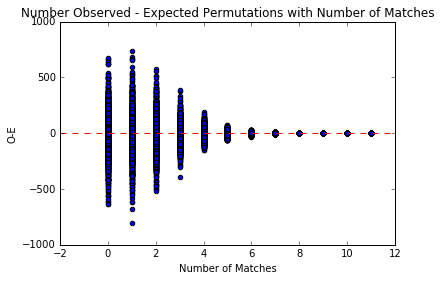

In [16]:
plt.scatter(num_matches, count_mismatch)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Number Observed - Expected Permutations with Number of Matches")
plt.xlabel("Number of Matches")
plt.ylabel("O-E")
plt.show()

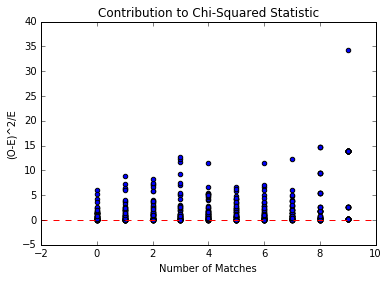

In [17]:
nmax = 9
bad_seed_ind = np.array(range(1000))[np.array(pvalues_nmax9) <= 0.05]

def modify_cell_counts(bincounts, nmax):
    bincounts_new = np.ones(nmax+1)
    bincounts_new[:nmax] = bincounts[:nmax]
    bincounts_new[nmax] = sum(bincounts[nmax:])
    return bincounts_new

expected_distr_new = modify_cell_counts(expected_counts, nmax=nmax)
chisq_stat = [(modify_cell_counts(cell_counts[j], nmax=nmax) - expected_distr_new)**2 / expected_distr_new for j in bad_seed_ind]
chisq_stat = np.concatenate(chisq_stat).ravel()
num_matches = np.array(list(range(nmax+1))*len(bad_seed_ind))

plt.scatter(num_matches, chisq_stat)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Contribution to Chi-Squared Statistic")
plt.xlabel("Number of Matches")
plt.ylabel("(O-E)^2/E")
plt.show()